# Begin

Link to data: WineReview_task_knn.ipynb datasets: wine-reviews: https://www.kaggle.com/zynicide/wine-reviews

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pandas.plotting import scatter_matrix

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
data  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/wine-reviews/winemag-data-130k-v2.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
del data['Unnamed: 0']

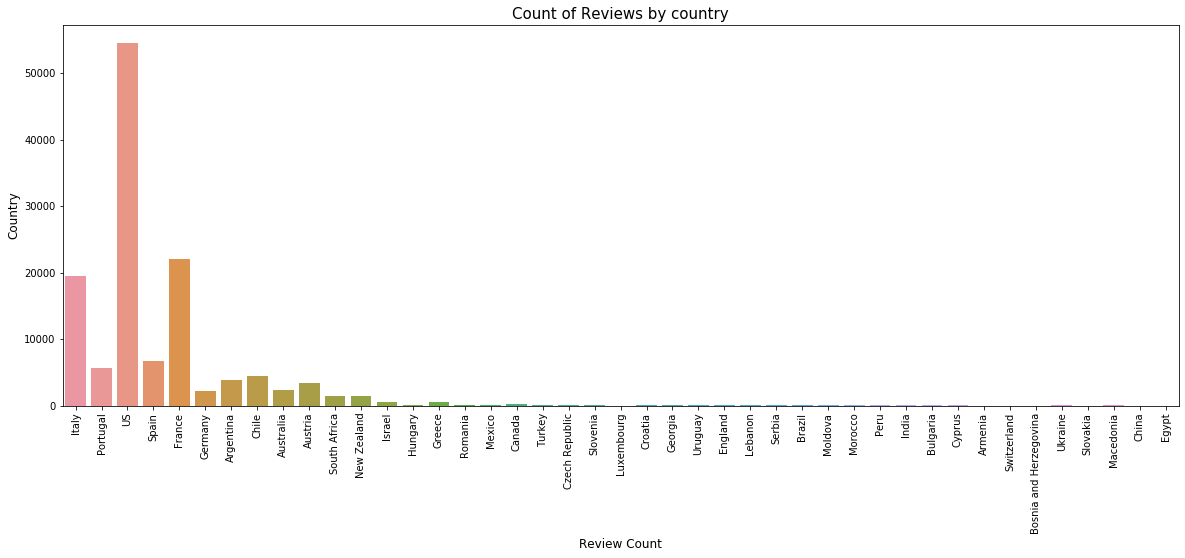

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

plt.figure(figsize=(20,7))
sns.countplot(x="country", data=data)
plt.ylabel("Country",fontsize = 12)
plt.xlabel("Review Count", fontsize=12)
plt.xticks(rotation=90)
plt.title("Count of Reviews by country", fontsize=15)
plt.show()

Выведем базовою статистику:

In [0]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


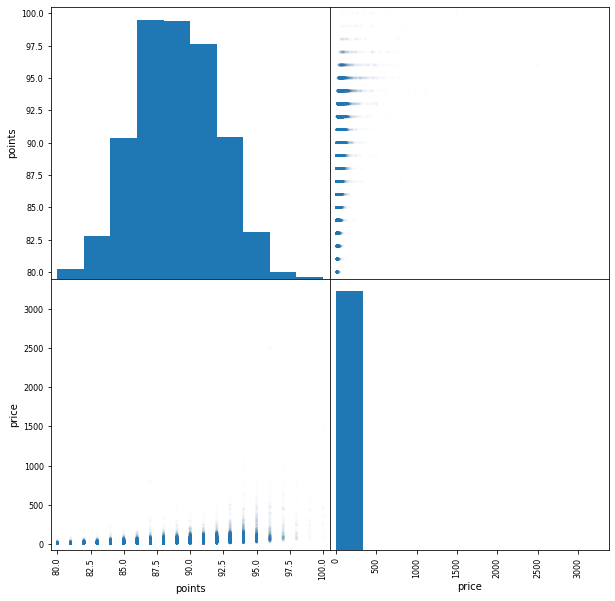

In [0]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [0]:
data.corr()

,points,price
points,1.000000,0.416167
price,0.416167,1.000000


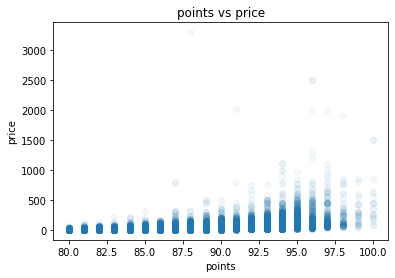

In [0]:
plt.plot(data['points'], data['price'], 'o', alpha = 0.05)
plt.xlabel('points')
plt.ylabel('price')
plt.title('points vs price')
pass

# Готовим данные

In [0]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [0]:
country_list = ['US','Italy','France','Spain','Chile','Argentina','Portugal','Australia','New Zealand','Germany','South Africa']
sub_data = data[data['country'].isin(country_list)]

In [0]:
categorical_columns = [c for c in sub_data.columns if sub_data[c].dtype.name == 'object']
numerical_columns   = [c for c in sub_data.columns if sub_data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']
['points', 'price']


# Обрабатываем пропущенные значения

In [0]:
sub_data.median(axis = 0)

points    88.0
price     25.0
dtype: float64

In [0]:
sub_data = sub_data.fillna(sub_data.median(axis = 0), axis = 0)

In [0]:
sub_data[numerical_columns].count(axis = 0)

points    124059
price     124059
dtype: int64

In [0]:
sub_data[categorical_columns].count(axis = 0)

country                  124059
description              124059
designation               87685
province                 124059
region_1                 108467
region_2                  50511
taster_name               97835
taster_twitter_handle     93087
title                    124059
variety                  124058
winery                   124059
dtype: int64

In [0]:
sub_data['country'].describe()

count     124059
unique        11
top           US
freq       54504
Name: country, dtype: object

In [0]:
sub_data['country'].describe().top

'US'

In [0]:
sub_data['country'] = sub_data['country'].fillna('US')

In [0]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,87685,124059,108467,50511,97835,93087,124059,124058,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,This zesty red has pretty aromas that suggest ...,Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,1873,36247,4480,11065,24381,24381,11,13081,222


In [0]:
data_describe = sub_data.describe(include = [object])
for c in categorical_columns:
    sub_data[c] = sub_data[c].fillna(data_describe[c]['top'])

In [0]:
sub_data.describe(include = [object])

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059,124059
unique,11,114587,35871,221,1218,17,17,14,113487,598,16044
top,US,This zesty red has pretty aromas that suggest ...,Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers
freq,54504,3,38247,36247,20072,84613,50605,55353,11,13082,222


# Векторизация

In [0]:
data_describe = sub_data.describe(include = [object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2 ]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['country', 'description', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety', 'winery']


In [0]:
# data = data.dropna()

del sub_data['taster_name']
del sub_data['taster_twitter_handle']

In [0]:
wine_France = sub_data[sub_data['country'] == 'France']

In [0]:
value_counts = wine_France["variety"].value_counts()
value_counts.head()

Bordeaux-style Red Blend    4725
Chardonnay                  2808
Pinot Noir                  1966
Rosé                        1923
Champagne Blend             1243
Name: variety, dtype: int64

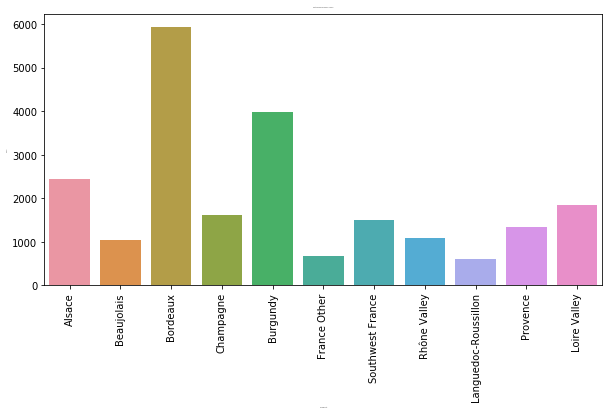

In [0]:
plt.figure(figsize=(10,5))
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
sns.countplot(x="province", data=wine_France,)
plt.ylabel("province",fontsize = .1)
plt.xlabel("Review Count", fontsize=.1)
plt.title("Count of Reviews by province in France", fontsize=.2)
plt.xticks(rotation=90)
plt.show()

In [0]:
varietylist = ['Bordeaux-style Red Blend','Chardonnay','Pinot Noir','Rosé','Champagne Blend']
subdata = wine_France[wine_France['variety'].isin(varietylist)]

In [0]:
subdata

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue
...,...,...,...,...,...,...,...,...,...,...,...
129823,France,Aromas of ripe yellow fruits announce a wine t...,Reserve,89,65.0,Burgundy,Chassagne-Montrachet,Central Coast,Chanson Père et Fils 2008 Chassagne-Montrachet,Chardonnay,Chanson Père et Fils
129825,France,"A fresh, juicy wine, with attractive acidity, ...",Reserve,88,30.0,Burgundy,Côte de Beaune-Villages,Central Coast,Camille Giroud 2008 Côte de Beaune-Villages,Pinot Noir,Camille Giroud
129839,France,"Although initially austere, this wine then ope...",Reserve,86,19.0,Bordeaux,Médoc,Central Coast,Barton & Guestier 2006 Médoc,Bordeaux-style Red Blend,Barton & Guestier
129931,France,"A powerful, chunky wine, packed with solid tan...",Reserve,91,107.0,Burgundy,Grands-Echezeaux,Central Coast,Henri de Villamont 2005 Grands-Echezeaux,Pinot Noir,Henri de Villamont


In [0]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(subdata['variety'])
label_encoded_y = label_encoder.transform(subdata['variety'])
subdata['encoded_winevariety'] = label_encoded_y
subdata.head()


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,encoded_winevariety
63,France,"This fat, yeasty Champagne is comprised predom...",Brut Rosé,86,58.0,Champagne,Champagne,Central Coast,Roland Champion NV Brut Rosé (Champagne),Champagne Blend,Roland Champion,1
65,France,"From the warm 2015 vintage, this is a soft and...",Reserve,86,24.0,Burgundy,Chablis,Central Coast,Simonnet-Febvre 2015 Chablis,Chardonnay,Simonnet-Febvre,2
66,France,"This soft, rounded wine is ripe with generous ...",Reserve,86,15.0,Burgundy,Mâcon-Milly Lamartine,Central Coast,Vignerons des Terres Secrètes 2015 Mâcon-Mill...,Chardonnay,Vignerons des Terres Secrètes,2
69,France,"This cooperative, based in Aÿ, has benefited f...",Brut Rosé,86,55.0,Champagne,Champagne,Central Coast,Collet NV Brut Rosé (Champagne),Champagne Blend,Collet,1
136,France,This wine's black cherry and plum flavors veer...,Reserve,91,50.0,Bordeaux,Saint-Émilion,Central Coast,Lassègue 2003 Saint-Émilion,Bordeaux-style Red Blend,Lassègue,0


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=5, max_features=100, strip_accents='unicode',lowercase =True,
    analyzer='word', token_pattern=r'\w+', use_idf=True, 
    smooth_idf=True, sublinear_tf=True, stop_words = 'english').fit(subdata["description"])

In [0]:
features = tfidf.get_feature_names()
print(features)

['2017', '2018', '2019', 'acidity', 'aftertaste', 'age', 'aging', 'apple', 'aromas', 'attractive', 'balance', 'balanced', 'berry', 'black', 'blackberry', 'blend', 'bodied', 'bright', 'character', 'cherry', 'citrus', 'comes', 'concentrated', 'core', 'crisp', 'currant', 'dark', 'delicious', 'dense', 'drink', 'dry', 'edge', 'end', 'fine', 'finish', 'firm', 'flavor', 'flavors', 'fresh', 'freshness', 'fruit', 'fruitiness', 'fruits', 'fruity', 'generous', 'gives', 'giving', 'good', 'great', 'intense', 'juicy', 'just', 'light', 'lively', 'merlot', 'mineral', 'needs', 'packed', 'palate', 'perfumed', 'plenty', 'plum', 'potential', 'powerful', 'produced', 'ready', 'red', 'rich', 'richness', 'ripe', 'rose', 'rounded', 's', 'showing', 'shows', 'smoky', 'smooth', 'soft', 'solid', 'spice', 'strawberry', 'structure', 'structured', 'style', 'sweet', 'tannic', 'tannins', 'texture', 'textured', 'tight', 'toast', 'touch', 'vintage', 'weight', 'white', 'wine', 'wood', 'years', 'yellow', 'young']


In [0]:
X_tfidf_text = tfidf.transform(subdata["description"])

# Нормализация количественных признаков

In [0]:
sub_data_2 = pd.DataFrame(X_tfidf_text.toarray())
subdata = subdata.reset_index()
sub_data_2['encoded_winevariety'] = subdata['encoded_winevariety']
sub_data_2['variety'] = subdata['variety']

In [0]:
sub_data_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,encoded_winevariety,variety
0,0.0,0.0,0.0,0.196421,0.386009,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.371860,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.202077,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.223902,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.363648,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.350532,0.280603,0.000000,0.000000,0.227411,0.0,0.000000,0.300702,0.0,0.0,0.000000,0.000000,0.327385,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1,Champagne Blend
1,0.0,0.0,0.0,0.173982,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.270920,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.178992,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.223931,0.000000,0.0,0.198324,0.0,0.000000,0.276236,0.000000,0.0,0.418064,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.201432,0.0,0.000000,0.266350,0.0,0.0,0.000000,0.000000,0.289986,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.383654,0.0,0.407912,0.120588,0.0,0.000000,0.000000,0.000000,2,Chardonnay
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.254758,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.168314,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.210572,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.357019,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.291966,0.000000,0.000000,0.000000,0.320708,0.0,0.365667,0.250461,0.0,0.0,0.000000,0.361246,0.272686,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.113394,0.0,0.000000,0.000000,0.364294,2,Chardonnay
3,0.0,0.0,0.0,0.206401,0.405623,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.388909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.212345,0.000000,0.0,0.0,0.421885,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.368344,0.294861,0.000000,0.000000,0.238966,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.344021,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.143058,0.0,0.000000,0.000000,0.000000,1,Champagne Blend
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.268743,0.0,0.000000,0.0,0.0,0.000000,0.40609,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.170928,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.213842,0.000000,0.0,0.189389,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.343933,0.0,0.000000,0.359125,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.369199,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.430652,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.264130,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.115155,0.0,0.000000,0.000000,0.000000,0,Bordeaux-style Red Blend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Обучающая и тестовая выборки

In [0]:
from sklearn.model_selection import train_test_split
seed = 6

test_size = 0.2
y = sub_data_2['encoded_winevariety']
X = sub_data_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [0]:
print(X.shape)
print(y.shape)

(12665, 100)
(12665,)


In [0]:
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

10132 2533


# KNN


K-NN - Это один из самых простых алгоритмов классификации
Что делает алгоритм?
Вычисляем расстояние до каждого из объектов обучающей выборки, затем отобирает k объектов из обучающей выборки, расстояние до которых минимально. Получается что класс классифицируемого объекта — это класс, который часто встречается среди k ближайших соседей.



In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6, n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')

In [0]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.22670746150809318 0.31385708645874455


Ошибка на тренировочных данных меньше, чем на тестовых данных. Переобучение?

In [0]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[843   9  20  41  22]
 [ 28  99  70   7  30]
 [ 66  55 425   7  30]
 [214   8  16 123  33]
 [ 28  32  57  22 248]]


Подберем параметры с помощью GridSearchCV

In [0]:
from sklearn.model_selection import GridSearchCV

neighbors = [1, 3, 5, 10, 20, 30, 40, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': neighbors}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.2924397947098303 45


In [0]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors, n_jobs=-1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.2765495459928938 0.2806948282668772


Ошибка увеличилась на тренировочных данных, но стала меньше на тестовых. Построим график зависимости ошибок.

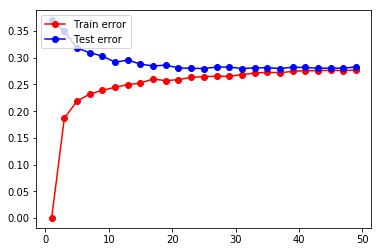

In [0]:
interval = range(1, 50, 2)

err_train = []
err_test = []

for k in interval:
    knn_neighbors = KNeighborsClassifier(n_neighbors = k)
    knn_neighbors.fit(X_train, y_train)
    
    err_train.append(np.mean(knn_neighbors.predict(X_train) != y_train))
    err_test.append(np.mean(knn_neighbors.predict(X_test) != y_test))
    
plt.plot(interval, err_train, 'r-o', label = 'train')
plt.plot(interval, err_test,  'b-o', label = 'test')  

plt.legend(loc = 2)

# SVC


Задача алгоритма - найти наиболее правильную линию, или гиперплоскость разделяющую данные на два класса. Алгоритм получает на вход данные,а на выходе возвращает разделяющую линию.

SVM ищет точки на графике, которые расположены к линии разделения ближе всего. Эти опорные вектора. После этого вычисляется расстояние между опорными векторами и разделяющей плоскостью - зазор. Основная цель — максимизировать расстояние зазора. 


In [0]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.3181010659297276 0.30754046585076983


In [0]:
y_test_predict = svc.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[894   0  23   3  15]
 [ 20   0 168   1  45]
 [ 36   0 542   0   5]
 [313   0  21  21  39]
 [ 27   0  63   0 297]]


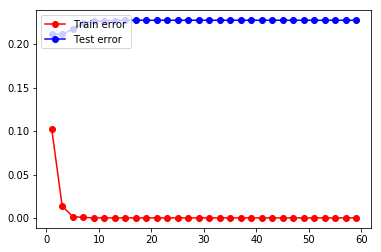

In [0]:
interval = range(1, 60, 2)

err_train = []
err_test = []

for c in interval:
    svc_scale = SVC(C = c, gamma = 'scale')
    svc_scale.fit(X_train, y_train)
    err_train.append(np.mean(svc_scale.predict(X_train) != y_train))
    err_test.append(np.mean(svc_scale.predict(X_test) != y_test))
    
plt.plot(interval, err_train, 'r-o', label = 'train')
plt.plot(interval, err_test,  'b-o', label = 'test')
plt.legend(loc = 2)

# Random Forest

In [0]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20489538097118043


In [0]:
y_test_predict = rf.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[851   1  29  36  18]
 [  5  90  97   3  39]
 [ 13  15 539   3  13]
 [143   3  11 202  35]
 [  6  13  29   7 332]]


In [0]:
np.sum(rf.feature_importances_)

1.0

In [0]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_names = X.columns
N, d = X.shape

print("Features:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Features:
 1. feature '   86' (0.083415)
 2. feature '   66' (0.057261)
 3. feature '   13' (0.049062)
 4. feature '   70' (0.029559)
 5. feature '   95' (0.027739)
 6. feature '   98' (0.024069)
 7. feature '   24' (0.022475)
 8. feature '    7' (0.022371)
 9. feature '    3' (0.020197)
10. feature '   29' (0.017157)
11. feature '   96' (0.017089)
12. feature '   40' (0.016889)
13. feature '   80' (0.015903)
14. feature '   35' (0.015649)
15. feature '   25' (0.015493)
16. feature '   30' (0.015408)
17. feature '   69' (0.014796)
18. feature '   20' (0.014718)
19. feature '   19' (0.014667)
20. feature '   14' (0.014411)
21. feature '   50' (0.014143)
22. feature '   37' (0.013761)
23. feature '   42' (0.013145)
24. feature '   87' (0.012192)
25. feature '   55' (0.011788)
26. feature '   72' (0.011604)
27. feature '   81' (0.011498)
28. feature '   12' (0.011225)
29. feature '   67' (0.010902)
30. feature '   77' (0.010450)
31. feature '   26' (0.010365)
32. feature '   54' (0.009986

In [0]:
feature_names[[1,0,1]]

Index([1, 0, 1], dtype='object')

(-1, 20)

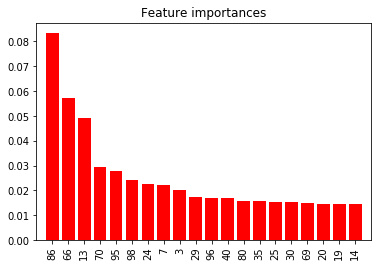

In [0]:
d_first = 20
plt.title("Feature importances")

plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

# Extremely Randomized Trees

In [0]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

9.869719699960521e-05 0.20963284642716146


In [0]:
y_test_predict = ert.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[858   1  25  35  16]
 [  6  91  92   5  40]
 [ 17  20 528   3  15]
 [150   4   9 197  34]
 [ 10   8  32   9 328]]


# AdaBoost

In [0]:
from sklearn import ensemble

ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.30783655744176863 0.3335965258586656


In [0]:
from sklearn.metrics import confusion_matrix

y_test_predict = ada.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[786   4  32  92  21]
 [  9 102  82  15  26]
 [ 20  59 459  21  24]
 [193   5  18 152  26]
 [ 20  88  36  54 189]]


# GBT

In [0]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.009573628108961705 0.204500592183182


In [0]:
y_test_predict = gbt.predict(X_test)
print(confusion_matrix(y_test, y_test_predict))

[[825   1  28  63  18]
 [  5 124  70   8  27]
 [ 10  30 516   5  22]
 [108   7  13 238  28]
 [  8  20  26  21 312]]


# PCA

In [0]:
Для ваших данных применить PCA для сокращения размерности пространства признаков. 
Изобразить точки, сократив размерность пространства до 2. К новым данным применить 
классификатор ближайших соседей (с наилучшим значением к-ва соседей, полученнных ранее).
Построить графики зависимости ошибки на тестовой и обучающей выборки в зависимости 
от количества используемых компонент. Найти наилучшее значение количества 
используемых главных компонент.

Попробуем упростить задачу алгоритму и воспользуемся сокращением размерности. Для этого выбран алгоритм PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 2)
pca_data = pca.fit_transform(X)

In [0]:
pca_data

array([[ 0.27881469,  0.24842781],
       [ 0.15283764, -0.0993093 ],
       [ 0.1204665 , -0.09377794],
       ...,
       [-0.18352408,  0.15444226],
       [-0.3446219 , -0.03989124],
       [-0.14341442,  0.07766236]])

Text(0.5, 1.0, 'dim = 2')

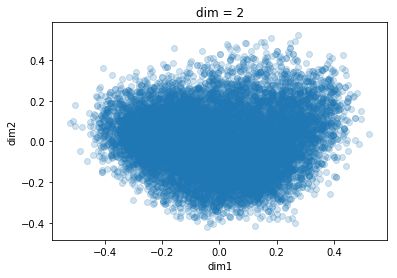

In [0]:
plt.scatter(pca_data[:,0], pca_data[:,1], alpha = .2)

plt.xlabel('dim1')
plt.ylabel('dim2')
plt.title('dim = 2')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

8865 3800


In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 45, n_jobs=-1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3187817258883249 0.34078947368421053


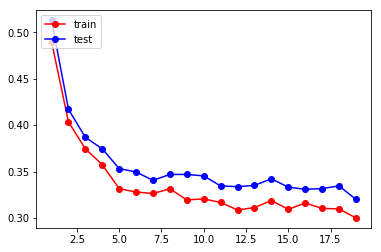

In [0]:
dim = range(1, 20, 1)
err_train = []
err_test = []

for d in dim:
    pca = PCA(n_components = d)
    pca_data = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size = 0.3, random_state = 42)
    
    knn = KNeighborsClassifier(n_neighbors = 45, n_jobs=-1).fit(X_train, y_train)
    
    err_train.append(np.mean(knn.predict(X_train) != y_train))
    err_test.append(np.mean(knn.predict(X_test) != y_test))
    
plt.plot(dim, err_train, 'r-o', label = 'train')
plt.plot(dim, err_test,  'b-o', label = 'test')    
plt.legend(loc = 2)

In [0]:
Найти наилучшее значение количества 
используемых главных компонент.

Как видно из графика - при увеличении кол-ва компонент, ошибка падает. 

# Neuro

1-2 скрытых слоя. Постройте графики зависимости ошибки на обучающей выборке и тестовой выборках от параметра alpha и от количества нейронов. Наблюдается ли переобучение/недообучение? 
Сделайте выводы. 
Обучить на ваших данных:
 1) random forests
 2) gradient boosted trees. 
Постройте графики зависимости ошибки (на тестовой и обучающейся выборках, а также oob-ошибку) от количества используемых деревьев. Наблюдается ли переобучение/недообучение? Сделайте выводы. Сделайте общие выводы по всем лабам. Какой метод оказался лучшим. Почему? 

In [0]:
from sklearn.model_selection import train_test_split

seed = 6

test_size = 0.3
y = sub_data_2['encoded_winevariety']
X = sub_data_2.drop(['encoded_winevariety','variety'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print(X.shape)
print(y.shape)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)


(12665, 100)
(12665,)
8865 3800


In [0]:
from sklearn.neural_network import MLPClassifier

# multilayer perceptron
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [0]:
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)

print(err_train, err_test)


0.21206993795826284 0.22842105263157894


In [0]:
# two layer fully-connected network
mlp_model = MLPClassifier(hidden_layer_sizes = (60, 10), solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [0]:
err_train = np.mean(y_train != y_train_pred)
err_test  = np.mean(y_test  != y_test_pred)

print(err_train, err_test)

0.2041737168640722 0.2363157894736842


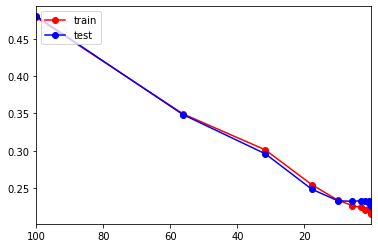

In [0]:
# alpha
import matplotlib.pyplot as plt

interval = np.logspace(-3, 2, 21)

err_train = []
err_test = []

for alpha in interval:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    err_train.append(np.mean(mlp_model.predict(X_train) != y_train))
    err_test.append(np.mean(mlp_model.predict(X_test) != y_test))

plt.xlim([np.max(interval), np.min(interval)])
plt.plot(interval, err_train, 'r-o', label = 'train')
plt.plot(interval, err_test,  'b-o', label = 'test')
plt.legend(loc = 2)


In [0]:
min_train_err = np.min(err_train)
min_test_err = np.min(err_test)
print(min_train_err, min_test_err)

0.2152284263959391 0.22605263157894737


In [0]:
# neurons
interval_n = np.arange(10, 100, 5)

err_test = []
err_train = []

for n in interval_n:
    mlp_model = MLPClassifier(hidden_layer_sizes = (n,), solver = 'lbfgs',
                              activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)
    err_train.append(np.mean(mlp_model.predict(X_train) != y_train))
    err_test.append(np.mean(mlp_model.predict(X_test) != y_test))


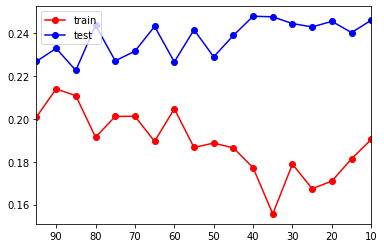

In [0]:
plt.xlim([np.max(interval_n), np.min(interval_n)])
plt.plot(interval_n, err_train, 'r-o', label = 'train')
plt.plot(interval_n, err_test,  'b-o', label = 'test')
plt.legend(loc = 2)


Видим, что в зависимости от числа нейронов ошибка может менятся, и при этом появляются выбросы.



In [0]:
min_train_err = np.min(err_train)
min_test_err = np.min(err_test)
print(min_train_err, min_test_err)

# best neurons count
neur = interval_n[err_test == min_test_err][0]
print(neur)

0.155668358714044 0.22263157894736843
85


Random forest

In [0]:
from sklearn import ensemble

rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.00011280315848843768 0.21921052631578947


In [0]:
counter = np.arange(25, 126, 5)

test_err = []
train_err = []
rf_err = []

for c in counter:
    rf = ensemble.RandomForestClassifier(n_estimators = c, oob_score=True)
    rf.fit(X_train, y_train)
    
    train_err.append(np.mean(y_train != rf.predict(X_train)))
    test_err.append(np.mean(y_test  != rf.predict(X_test)))
    rf_err.append(1 - rf.oob_score_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


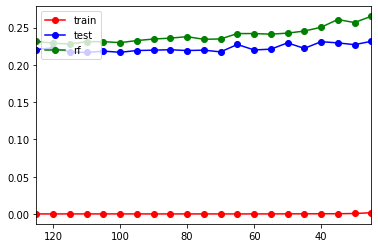

In [0]:
plt.xlim([np.max(counter), np.min(counter)])
plt.plot(counter, train_err, 'r-o', label = 'train')
plt.plot(counter, test_err,  'b-o', label = 'test')
plt.plot(counter, rf_err, 'g-o', label = 'rf')
plt.legend(loc = 2)

In [0]:
optimal = counter[test_err == np.min(test_err)]
optimal = optimal[0]
print(optimal)

110


In [0]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.00011280315848843768 0.21657894736842107


Gradient Boosted Trees

In [0]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
counter = np.arange(25, 126, 5)

test_err = []
train_err = []

for c in counter:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = c)
    gbt.fit(X_train, y_train)
    train_err.append(np.mean(y_train != gbt.predict(X_train)))
    test_err.append(np.mean(y_test  != gbt.predict(X_test)))

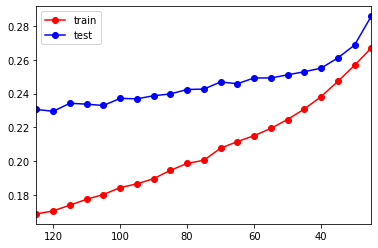

In [0]:
plt.xlim([np.max(counter), np.min(counter)])
plt.plot(counter, train_err, 'r-o', label = 'train')
plt.plot(counter, test_err,  'b-o', label = 'test')
plt.legend(loc = 2)

In [0]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.16864072194021432 0.2294736842105263



В результате работы мы получили сведения о наших данных, применяя к ним  инструменты статистики, визуализации и корреляции.

В результате чего можно избавится от выбросов в данных, пустых полей, изменить структуру данных, адаптируя их и получая возможность обучать на них модели.

С помощью алгоритмов обучения, которые использовались в работе, можно понять структуру данных ( многомерных и с пониженой рамерностью).

Наборе данных, который используется мной, имеет признаки, которые не информативны, поэтому уменьшение числа признаков повысило качество и понизило получаемую ошибку. В каждом из случаев, нужно убедится, что мы не наблюдаем переобучения или неверно настроили модель, получая результаты обучения.

